In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'..')
import numpy as np
import pynamod
from pynamod.bp_step_geometry import get_params_for_single_step_debug
from pynamod.parsers_3dna import parse_bp_par_file
from six import StringIO

## ref frames to bp steps

In [3]:
#recreation stuff from 3dna example
o1 = np.array([15.0378, 0.1221, -4.6088])
o2 = np.array([14.6869, 2.9781, -2.3818])

R1=np.array([
[-0.2323, -0.8985, -0.3724],
[0.7889, -0.3980, 0.4682],
[-0.5689, -0.1851, 0.8013]])
R2=np.array([
[-0.6319, -0.6594, -0.4072],
[0.3583, -0.7144, 0.6010],
[-0.6873, 0.2339, 0.6877]])


print(get_params_for_single_step_debug(o1,o2,R1,R2))

hinge axis
[-0.89926635 -0.39548455 -0.18684753]
Roll Tilt angle, degrees
10.236212178842694
R_hinge
[[ 0.99923719 -0.0152505   0.03595073]
 [ 0.01808648  0.99663653 -0.07992807]
 [-0.03461087  0.08051733  0.99615212]]
R2'
[[-0.66159118 -0.63959317 -0.39133162]
 [ 0.40060059 -0.74261854  0.53664721]
 [-0.63393539  0.19830081  0.74753827]]
R1'
[[-0.19816425 -0.89860656 -0.39138153]
 [ 0.74398295 -0.39786252  0.53682305]
 [-0.63811755 -0.18487812  0.74740632]]
Rm
[[-0.4489496  -0.80326915 -0.39136452]
 [ 0.59768197 -0.59557497  0.53674602]
 [-0.66424432  0.00700952  0.74748747]]
om
[14.86235  1.5501  -3.4953 ]
Shift Slide Rise
[0.38524403471554347, -1.4034847639123533, 3.334931049983717]
phi  16.945209828180445
(0.38524403471554347, -1.4034847639123533, 3.334931049983717, 2.983416580378309, 9.791795814773268, 33.522498611952365)


In [4]:
o1 = np.array([15.0378, 0.1221, -4.6088])
o2 = np.array([14.6869, 2.9781, -2.3818])

R1=np.array([
[-0.2323, -0.8985, -0.3724],
[0.7889, -0.3980, 0.4682],
[-0.5689, -0.1851, 0.8013]])
R2=np.array([
[-0.6319, -0.6594, -0.4072],
[0.3583, -0.7144, 0.6010],
[-0.6873, 0.2339, 0.6877]])

from pynamod.bp_step_geometry import get_params_for_single_step_stock, get_params_for_single_step_numba2

print(get_params_for_single_step_stock(o1,o2,R1,R2))
#%timeit get_params_for_single_step_stock(o1,o2,R1,R2)
print(get_params_for_single_step_numba2(o1,o2,R1,R2))
#%timeit get_params_for_single_step_numba2(o1,o2,R1,R2)

(0.36887843311639523, -1.3437836422562135, 3.334863345684651, 2.8195223211845715, 9.840240528088195, 31.645213532807098)


../pynamod/bp_step_geometry.py:104: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  twist=  np.rad2deg(np.dot(np.array(cross_product(R1p[:,1],R2p[:,1])),Rm[:,2]))
../pynamod/bp_step_geometry.py:105: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  phi=np.dot(np.array(cross_product(hinge,Rm[:,1])),Rm[:,2])
../pynamod/bp_step_geometry.py:96: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  RollTilt= (np.arccos(np.dot(z1,z2)))


(0.36887843311639523, -1.3437836422562135, 3.334863345684651, 2.8195223211845715, 9.840240528088195, 31.645213532807098)


## bp steps to ref frames

In [5]:
from pynamod.bp_step_geometry import get_ori_and_mat_from_step,get_ori_and_mat_from_step_opt
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
o1 = np.array([15.0378, 0.1221, -4.6088])
o2 = np.array([14.6869, 2.9781, -2.3818])

R1=np.array([
[-0.2323, -0.8985, -0.3724],
[0.7889, -0.3980, 0.4682],
[-0.5689, -0.1851, 0.8013]])
R2=np.array([
[-0.6319, -0.6594, -0.4072],
[0.3583, -0.7144, 0.6010],
[-0.6873, 0.2339, 0.6877]])

params=get_params_for_single_step_stock(o1,o2,R1,R2)

get_ori_and_mat_from_step(*params,R1,o1)
get_ori_and_mat_from_step_opt(*params,R1,o1)
#%timeit get_ori_and_mat_from_step(*params,R1,o1)
#%timeit get_ori_and_mat_from_step_opt(*params,R1,o1)

(array([14.661 ,  2.9233, -2.3561]),
 array([[-0.6098, -0.6798, -0.4073],
        [ 0.3814, -0.7022,  0.6011],
        [-0.6947,  0.2112,  0.6875]]))

In [6]:
from pynamod.bp_step_geometry import rebuild_by_full_par_frame_numba
header,pairtypes,full_par_frame=parse_bp_par_file('Resources/1kx5.par')
bp_frames=rebuild_by_full_par_frame_numba(full_par_frame)
#bp_frames

Processing  Resources/1kx5.par


../pynamod/bp_step_geometry.py:194: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 2d, A))
  bp_frames[i-1,:3,:3],bp_frames[i-1,3,:3])
../pynamod/bp_step_geometry.py:194: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  bp_frames[i-1,:3,:3],bp_frames[i-1,3,:3])


In [7]:
from pynamod.visual_ngl import show_ref_frames
show_ref_frames(bp_frames)

NGLWidget()

## Creating special steps (histone octameres, dyes, etc)

In [9]:
# histone octamer from 1kx5
import MDAnalysis as mda
import nglview as nv
from pynamod.non_DNA_geometry import get_obj_orientation_and_location,get_rotation_and_offset_ref_frame_to_obj
from pynamod.parsers_3dna import ref_frames_to_array
nucl = mda.Universe('Resources/1KX5.pdb')
bp_frames_1kx5=ref_frames_to_array('Resources/1kx5_ref_frames.dat')[0]

sel_text="(segid A E and (resid 44:135 or (resid 43 and name C O CA))) or \
(segid B F and (resid 23:102 or (resid 22 and name C O CA))) or \
(segid C G and (resid 16:102 or (resid 15 and name C O CA) or (resid 103 and name N CA))) or \
(segid D H and (resid 34:122 or (resid 33 and name C O CA)))"

nucl_trunc=nucl.select_atoms(sel_text)
nucl_trunc.atoms
view=nv.show_mdanalysis(nucl)

cog=nucl_trunc.atoms.center_of_geometry()
axes=nucl_trunc.atoms.principal_axes()


o1 = bp_frames_1kx5[73,3,:3]
o2 = cog

ref_mat=bp_frames_1kx5[73,:3,:3]
obj_mat=axes

# gettng rotation and offset from dyad base pair to histone core
R2,of_vec=get_rotation_and_offset_ref_frame_to_obj(ref_mat,o1,obj_mat,o2)
print(R2,of_vec)
#getting location and orientation of histone core from the above
calcR2,calcO2=get_obj_orientation_and_location(ref_mat,o1,R2,of_vec)

view=show_ref_frames(bp_frames_1kx5,view,spheres=False,arrows=False,diamonds=False,boxes=True)

view.shape.add_sphere(o2.tolist(),[0,1,0],3)
view.shape.add_arrow(calcO2.tolist(),(calcO2 + 40*calcR2[0]).tolist(),[1,0,0],3)
view.shape.add_arrow(calcO2.tolist(),(calcO2 + 40*calcR2[1]).tolist(),[0,1,0],3)
view.shape.add_arrow(calcO2.tolist(),(calcO2 + 40*calcR2[2]).tolist(),[0,0,1],3)


view

[[-0.9194  0.275   0.2815]
 [-0.3555 -0.2733 -0.8939]
 [-0.1688 -0.9218  0.349 ]] [44.2273 -4.1654 -0.3646]


NGLWidget()

In [74]:
# dye label positions
from six import StringIO
from MDAnalysis.analysis import align
cy3_pdb="""CRYST1    0.000    0.000    0.000  90.00  90.00  90.00 P 1           1
ATOM      1  C5'     X   1      68.700  78.038  79.112  0.00  0.00           C
ATOM      2  C4'     X   1      69.511  79.046  78.321  0.00  0.00           C
ATOM      3  O4'     X   1      70.934  78.735  78.319  0.00  0.00           O
ATOM      4  C3'     X   1      69.158  79.168  76.839  0.00  0.00           C
ATOM      5  C2'     X   1      70.237  78.360  76.117  0.00  0.00           C
ATOM      6  C1'     X   1      71.407  78.813  76.983  0.00  0.00           C
ATOM      7  COM     X   1      82.545  71.069  78.421  0.00  0.00           C
END"""
cy5_pdb="""CRYST1    0.000    0.000    0.000  90.00  90.00  90.00 P 1           1
ATOM      1  C5'     X   1      68.405  78.184  78.864  0.00  0.00           C
ATOM      2  C4'     X   1      69.216  79.192  78.074  0.00  0.00           C
ATOM      3  O4'     X   1      70.639  78.881  78.071  0.00  0.00           O
ATOM      4  C3'     X   1      68.863  79.314  76.592  0.00  0.00           C
ATOM      5  C2'     X   1      69.941  78.507  75.869  0.00  0.00           C
ATOM      6  C1'     X   1      71.111  78.960  76.735  0.00  0.00           C
ATOM      7  COM     X   1      82.870  72.053  79.068  0.00  0.00           C
END"""
cy3_u=mda.Universe(StringIO(cy3_pdb), format="pdb")
cy5_u=mda.Universe(StringIO(cy5_pdb), format="pdb")

forw_dyad_sel_text="segid I and resid 0 and name C5' C4' O4' C3' C2' C1'"
rev_dyad_sel_text="segid J and resid 0 and name C5' C4' O4' C3' C2' C1'"
label_sel_text="name C5' C4' O4' C3' C2' C1'"


o1 = bp_frames_1kx5[73,3,:3]
ref_mat=bp_frames_1kx5[73,:3,:3]
obj_mat=np.identity(3)

align.alignto(cy3_u,nucl,(label_sel_text,forw_dyad_sel_text))
o2 = cy3_u.atoms[-1].position
cy3_forw_R,cy3_forw_offset=get_rotation_and_offset_ref_frame_to_obj(ref_mat,o1,obj_mat,o2)

align.alignto(cy3_u,nucl,(label_sel_text,rev_dyad_sel_text))
o2 = cy3_u.atoms[-1].position
cy3_rev_R,cy3_rev_offset=get_rotation_and_offset_ref_frame_to_obj(ref_mat,o1,obj_mat,o2)

align.alignto(cy5_u,nucl,(label_sel_text,forw_dyad_sel_text))
o2 = cy5_u.atoms[-1].position
cy5_forw_R,cy5_forw_offset=get_rotation_and_offset_ref_frame_to_obj(ref_mat,o1,obj_mat,o2)

align.alignto(cy5_u,nucl,(label_sel_text,rev_dyad_sel_text))
o2 = cy5_u.atoms[-1].position
cy5_rev_R,cy5_rev_offset=get_rotation_and_offset_ref_frame_to_obj(ref_mat,o1,obj_mat,o2)




calcR2,calcO2=get_obj_orientation_and_location(bp_frames_1kx5[73,:3,:3],bp_frames_1kx5[73,3,:3],cy3_forw_R,cy3_forw_offset)
view.shape.add_sphere(calcO2.tolist(),[0,1,0],4)

calcR2,calcO2=get_obj_orientation_and_location(bp_frames_1kx5[73,:3,:3],bp_frames_1kx5[73,3,:3],cy3_rev_R,cy3_rev_offset)
view.shape.add_sphere(calcO2.tolist(),[0,1,0],4)

calcR2,calcO2=get_obj_orientation_and_location(bp_frames_1kx5[73,:3,:3],bp_frames_1kx5[73,3,:3],cy5_forw_R,cy5_forw_offset)
view.shape.add_sphere(calcO2.tolist(),[0,0,1],4)

calcR2,calcO2=get_obj_orientation_and_location(bp_frames_1kx5[73,:3,:3],bp_frames_1kx5[73,3,:3],cy5_rev_R,cy5_rev_offset)
view.shape.add_sphere(calcO2.tolist(),[0,0,1],4)
labels={'cy3_forward':}

In [121]:
tp = np.dtype([('name', 'U16'), ('R_mat', 'f8', (3, 3)), ('Of_vec', 'f8', (3))])
dye_data = np.zeros(4, dtype=tp)
dye_data['name']=['cy3_forward','cy3_reverse','cy5_forward','cy5_reverse']
dye_data['R_mat']=[cy3_forw_R,cy3_rev_R,cy5_forw_R,cy5_rev_R]
dye_data['Of_vec']=[cy3_forw_offset,cy3_rev_offset,cy5_forw_offset,cy5_rev_offset]

[]


In [128]:
np.save('../pynamod/dyes',dye_data)

In [130]:
np.load('../pynamod/dyes.npy')

array([('cy3_forward', [[-0.0933, -0.1554, -0.9835], [-0.9771,  0.2043,  0.0604], [ 0.1915,  0.9665, -0.1709]], [ 8.3849, -3.2398, -1.3305]),
       ('cy3_reverse', [[-0.0933, -0.1554, -0.9835], [-0.9771,  0.2043,  0.0604], [ 0.1915,  0.9665, -0.1709]], [ 8.0086,  2.7326,  1.6989]),
       ('cy5_forward', [[-0.0933, -0.1554, -0.9835], [-0.9771,  0.2043,  0.0604], [ 0.1915,  0.9665, -0.1709]], [ 7.8403, -3.9781, -2.3577]),
       ('cy5_reverse', [[-0.0933, -0.1554, -0.9835], [-0.9771,  0.2043,  0.0604], [ 0.1915,  0.9665, -0.1709]], [ 7.4718,  3.4373,  2.7535])],
      dtype=[('name', '<U16'), ('R_mat', '<f8', (3, 3)), ('Of_vec', '<f8', (3,))])

In [29]:
a.position

array([ 50.1829, 123.2285,   0.7881], dtype=float32)

### Creating nucleosome fiber

In [26]:
header,pairtypes,full_par_frame=parse_bp_par_file('Resources/init_fiber.par')
full_par_frame=np.tile(full_par_frame,(100,1))
N=12*100
nps_length=147
linker_length=40
from pynamod.utils import get_movable_steps

movable_steps=get_movable_steps([[i,i+linker_length+15] for i in (nps_length+linker_length)* np.arange(N)])

for i in np.arange(10):
    full_par_frame[movable_steps,9:12]+=np.random.normal(0,1,size=full_par_frame[movable_steps,9:12].shape)


bp_frames=rebuild_by_full_par_frame_numba(full_par_frame)

beads=[]
for i in (nps_length+linker_length)* np.arange(N)+73+linker_length:
    full_par_frame
    o1 = bp_frames[i,3,:3]
    R1=bp_frames[i,:3,:3]
    mat,ori=get_obj_orientation_and_location(R1,o1,R2,of_vec)
    beads.extend(ori)
octamers=np.array(beads).reshape((-1,3))

Processing  Resources/init_fiber.par


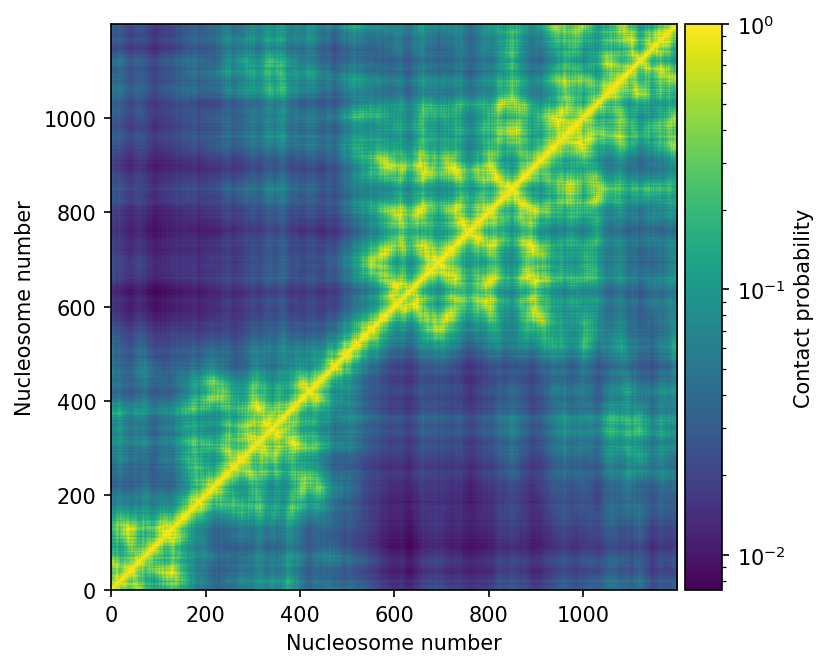

In [32]:
from scipy.spatial.distance import cdist,pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
distances=squareform(pdist(octamers))
%matplotlib inline
contact_dist=500

fig = plt.figure(figsize=(5,5),dpi=150)
ax1 = fig.add_subplot(111)




im=ax1.imshow(1/(1+(distances/contact_dist)**2),norm=LogNorm(),origin='lower')
ax1.set_xlabel(u'Nucleosome number')
ax1.set_ylabel(u'Nucleosome number')
cbaxes = fig.add_axes([0.9, 0.125, 0.05, 0.755]) 
cb=fig.colorbar(im, cax=cbaxes)
cb.set_label('Contact probability')
plt.savefig('distance_map.svg',dpi=600)
plt.show()

In [28]:
view=show_ref_frames(bp_frames,arrows=False,diamonds=False,boxes=False)
view.shape.add_buffer('sphere',position=beads,color=[1,0,0]*(len(beads)//3),radius=[35]*(len(beads)//3))
view

NGLWidget()

In [30]:
view.download_image('small_nucl_fiber_new.png',factor=6,transparent=True)

In [18]:
## Creating fiber trajectory
from tqdm.auto import tqdm

In [19]:
from six import BytesIO
from pynamod.utils import get_movable_steps
header,pairtypes,full_par_frame=parse_bp_par_file('Resources/init_fiber.par')
mult=5
full_par_frame=np.tile(full_par_frame,(mult,1))
N=12*mult
nps_length=147
linker_length=40
movable_steps=get_movable_steps([[i,i+linker_length+15] for i in (nps_length+linker_length)* np.arange(N)])
pdb_string=''
for frame in tqdm(range(100)):
    full_par_frame[movable_steps,9:12]+=np.random.normal(0,0.25,size=full_par_frame[movable_steps,9:12].shape)

    bp_frames=rebuild_by_full_par_frame_numba(full_par_frame)
    beads=[]
    for i in (nps_length+linker_length)* np.arange(N)+73+linker_length:
        full_par_frame
        o1 = bp_frames[i,3,:3]
        R1=bp_frames[i,:3,:3]
        mat,ori=get_obj_orientation_and_location(R1,o1,R2,of_vec)
        beads.extend(ori)
    octamers=np.array(beads).reshape((-1,3))

    
    num=1
    pdb_string=pdb_string+'MODEL     %4s\n'%frame
    for row in bp_frames[:,3,:3]/10:
        pdb_string=pdb_string+"ATOM  %5d  N   DNA A   1    %8.3f%8.3f%8.3f\n"%(num,row[0],row[1],row[2])
        num+=1
    for row in octamers/10:            
        pdb_string=pdb_string+"ATOM  %5d  O   NUC B   1    %8.3f%8.3f%8.3f\n"%(num,row[0],row[1],row[2])
        num+=1
    pdb_string=pdb_string+"ENDMDL\n"
#print(xyz_string[:100])

Processing  Resources/init_fiber.par


In [15]:
u = mda.Universe(StringIO(pdb_string),format='pdb')

In [16]:
from MDAnalysis.analysis import align
alignment = align.AlignTraj(u, u,in_memory=True)
alignment.run()

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/coordinates/base.py:837: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


In [17]:
view=nv.show_mdanalysis(u)
view.clear_representations()
view.add_spacefill('.O',radius=3)
view.add_spacefill('.N',radius=0.5)
view

NGLWidget(max_frame=99)

In [ ]:
u.atoms.write('../docs/Resources/collapse.pdb')
u.atoms.write('../docs/Resources/collapse.xtc',frames=u.trajectory)


In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
%timeit distances=pdist(octamers)
%timeit distances=squareform(pdist(octamers))